# Women's National Basketball Association statistics

We are working with WNBAthe WNBA dataset, containing general information about female players, along with their metrics for the season 2016 - 2017. The `WNBA Stats.csv` can be downloaded from [Kaggle](https://www.kaggle.com/jinxbe/wnba-player-stats-2017).

We are using some simple statistical tools to explore the data, focusing on **sampling**.

## Get familiar with the dataset

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option("max_columns",100)
%matplotlib inline

wnba = pd.read_csv('WNBA Stats.csv')
print(wnba.head())
print(wnba.tail())
print(wnba.shape)

              Name Team  Pos  Height  Weight        BMI Birth_Place  \
0    Aerial Powers  DAL    F     183    71.0  21.200991          US   
1      Alana Beard   LA  G/F     185    73.0  21.329438          US   
2     Alex Bentley  CON    G     170    69.0  23.875433          US   
3  Alex Montgomery  SAN  G/F     185    84.0  24.543462          US   
4     Alexis Jones  MIN    G     175    78.0  25.469388          US   

           Birthdate  Age         College Experience  Games Played  MIN  FGM  \
0   January 17, 1994   23  Michigan State          2             8  173   30   
1       May 14, 1982   35            Duke         12            30  947   90   
2   October 27, 1990   26      Penn State          4            26  617   82   
3  December 11, 1988   28    Georgia Tech          6            31  721   75   
4     August 5, 1994   23          Baylor          R            24  137   16   

   FGA   FG%  15:00  3PA   3P%  FTM  FTA   FT%  OREB  DREB  REB  AST  STL  \
0   85  35.3   

There are totally 143 players in the season 2016-2017, being represented with their information about the team, game position, physical details, age, place of birth, experience, game statistics, ...

## Sampling error

**parameter** : a metric specific to a population

**statistic** : a metric specific to a sample

**sampling error = parameter - statistic**


Finding the sampling error of the maximum number of games played by a player

In [4]:
# finding the maximum number of games played by the population 
parameter = wnba['Games Played'].max()

# take a sample randomly of 30 players from the population
sample = wnba['Games Played'].sample(30, random_state=1)

# fiding the maximum number of games played by a sample
statistic = sample.max()

sampling_error = parameter - statistic
print(parameter)
print(statistic)
sampling_error

32
30


2

The maximum games played by the population is 32. While one played by the sample is 30. So there is a sampling error of 2. 

When we sample we want to mimimize the sampling error as much as possible. In other words, we want our sample to mirror the population as closely as possible.

In statistical terms, we want our samples to be **representative** of their corresponding populations. If a sample is representative, then the sampling error is low.

To make our samples representative, we can try to give every individual in the population an equal chance to be selected in our samples, so we need to sample randomly.

## Simple random sampling (SRS)

One way to perform SRS is to generate random numbers and use them to select a few sample units from the population.

Experiencing with the column `PTS`, the points scored by a player during the 2016-2017 season.

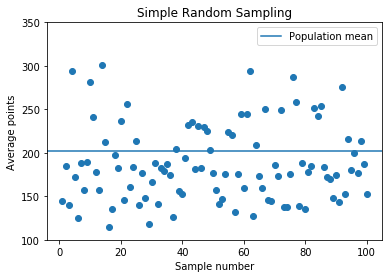

In [44]:
# take 100 samples of 10 values from the PTS column, and for each sample measure the average points scored by a player.
sample_means = []

for n in range(100):
    sample = wnba['PTS'].sample(10, random_state=n)
    avg = sample.mean()
    sample_means.append(avg)

# find the average points of the population
population_mean = wnba['PTS'].mean()

# plot the discrepancy
plt.scatter(range(1,101), sample_means)
plt.axhline(population_mean, label='Population mean')
plt.ylim(100,350)
plt.xlabel('Sample number')
plt.ylabel('Average points')
plt.title('Simple Random Sampling')
plt.legend(loc='upper right')
plt.show()

In [11]:
print(max(sample_means))
print(min(sample_means))
print(population_mean)

301.4
115.0
201.7902097902098


From the scatter plot, we can notice that the sample means vary a lot around the population mean. With a minimum sample mean of 115 pts, a maximum of 301.4 pts, and a population mean of roughly 201.8, we can tell that the sampling error is quite large for some of the cases. So there is a good chance that we get samples that are not representative of the population.

To avoid a large sampling error, we need **increase the sample size**. 

**The greater the sample size, the more similar the sample is comparing to the population, so the lower the chance of getting unrepresentative samples.**

So this time, let's increase the sample size respectively by 40, 80 and 100.

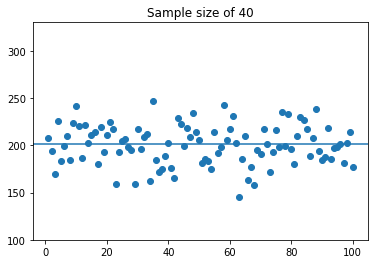

None


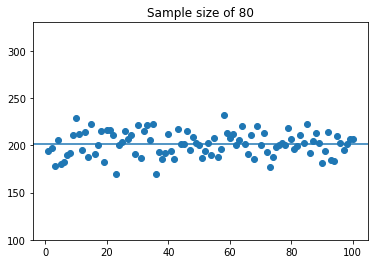

None


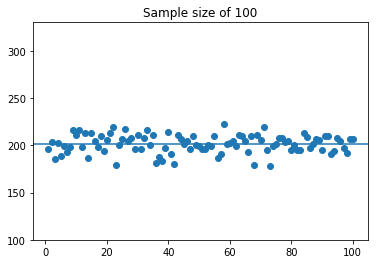

None


In [20]:
def sample_mean(size):
    sample_means = []
    for n in range(100):
        sample = wnba['PTS'].sample(size, random_state=n)
        avg = sample.mean()
        sample_means.append(avg)
    
    population_mean = wnba['PTS'].mean()
    
    plt.scatter(range(1,101), sample_means)
    plt.title('Sample size of ' + str(size))
    plt.ylim(100,330)
    plt.axhline(population_mean)
    plt.show()

print(sample_mean(40))
print(sample_mean(80))
print(sample_mean(100))

We can see that when increasing the sample size, the sampling error is significantly dropping. Another way to speak, the average points scored of every sample is as closer as possible to the population's one.

## Stratified Sampling

Another problem revealed: if we perform simple random sampling in a general manner, there's a chance that some categories won't be included in our sample, because the metrics of a player (number of points, number of assists,...) depend on their position.

In other words, it's not guaranteed that we'll have a representative sample that has observations for every positions we want to analyze.

In [23]:
wnba['Pos'].unique()

array(['F', 'G/F', 'G', 'C', 'F/C'], dtype=object)

There are 5 positions in a basketball game, which are:

|Abbreviation       |Full name           |
|-------------------|--------------------|
|F                  |Forward             |
|G/F                |Guard/Forward       |
|G                  |Guard               |
|C                  |Center              |
|F/C                |Forward/Center      |

To ensure we end up with a sample that has observations for all the categories of interest, we can change the sampling method. We can organize our data set into different groups, and then do a SRS for every group. For instance, we are **stratifying** the data **by player position**, and then SRS each group.

This method is called **stratified sampling**, and each stratified group is aka **stratum**.

In [26]:
# create a new column that describes the number of points a player scored per game during the season
wnba['pts_per_game'] = wnba['PTS'] / wnba['Games Played']

# stratify the data set by player position
stratum_C = wnba[wnba['Pos'] == 'C']
stratum_F = wnba[wnba['Pos'] == 'F']
stratum_FC = wnba[wnba['Pos'] == 'F/C']
stratum_G = wnba[wnba['Pos'] == 'G']
stratum_GF = wnba[wnba['Pos'] == 'G/F']

# loop through the strata, for each stratum, sample 10 observations using SRS
stratum_pos = [
    (stratum_C, 'C'),
    (stratum_F, 'F'),
    (stratum_FC, 'F/C'),
    (stratum_G, 'G'),
    (stratum_GF, 'GF')
]

sample_mean = {}

for stratum, position in stratum_pos:
    sample = stratum['pts_per_game'].sample(10, random_state=0)
    sample_mean[position] = sample.mean()

sample_mean

{'C': 9.833761394334251,
 'F': 8.702175158545568,
 'F/C': 9.059118773946361,
 'G': 7.092926195632343,
 'GF': 6.817264935760487}

In [27]:
# find the most scored position among the 5
position_most_scored = max(sample_mean, key=sample_mean.get)
position_most_scored

'C'

## Proportional Stratified Sampling

Let's take a look at the percentages of games played during the season

In [28]:
wnba['Games Played'].value_counts(bins=3, normalize=True) * 100

(22.0, 32.0]     72.727273
(12.0, 22.0]     18.181818
(1.969, 12.0]     9.090909
Name: Games Played, dtype: float64

Appromximately 73% of the players had played more than 23 games for this season, which means that the mean of the total points is probably influenced by this category of players wo played a lot of games. The next interval including those who played from 13 to 22 games holds 18%, and the last one including who played less than 12 games represent 9%. 

However, when we sample randomly, we can end up with a sample where the proprotions are different than in the population. For instance, we might end up with 2 cases:
- in the one hand, a sample where only 2% of the players played more than 23 games. This result **underestimates** the population mean because it is supposed to take more over-23-games players into account than usual.
- in the other hand, a sample where more than 97% of the players had 23 games in this season. This result **overestimates** the population mean because it is supposed to include players who played much less.

One solution to this problem is to use **stratified sampling while being mindful of the proportions in the population**.

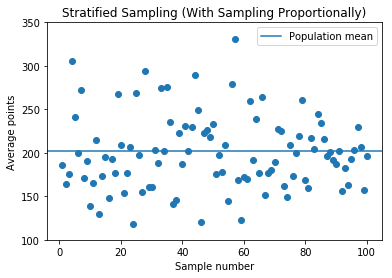

In [45]:
# stratify data by number of games played
under_12 = wnba[wnba['Games Played'] <= 12]
btw_13_22 = wnba[(wnba['Games Played'] > 12) & (wnba['Games Played'] <= 22)]
over_23 = wnba[wnba['Games Played'] > 22]

# Do random sampling 1OO times with sample values of 10: 
# for each strata, sample each stratum proportionally with the size ratio 1:2:7
# (the size of the final sample is 10)
propor_sample_means = []

for n in range(100):
    sample_1 = under_12['PTS'].sample(1, random_state=n)
    sample_2 = btw_13_22['PTS'].sample(2, random_state=n)
    sample_3 = over_23['PTS'].sample(7, random_state=n)
    sample_final = pd.concat([sample_1, sample_2, sample_3])
    propor_sample_means.append(sample_final.mean())

plt.scatter(range(1,101), propor_sample_means)
plt.axhline(wnba['PTS'].mean(), label='Population mean')
plt.ylim(100,350)
plt.xlabel('Sample number')
plt.ylabel('Average points')
plt.title('Stratified Sampling (With Sampling Proportionally)')
plt.legend(loc='upper right')
plt.show()

## Choosing the Right Data

Let's comparing the 2 plots we've created

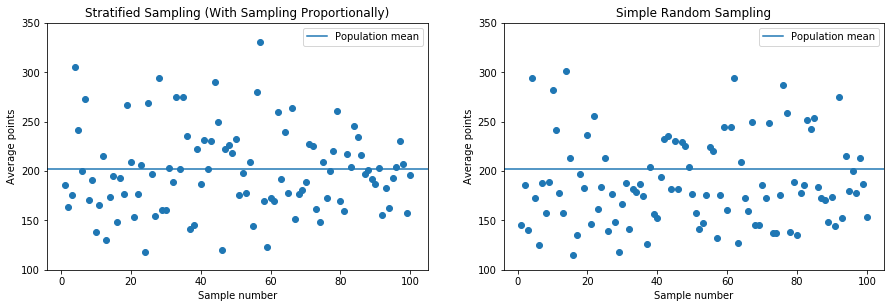

In [69]:
fig = plt.figure(figsize=(15,10))
    
ax1 = fig.add_subplot(2,2,1)
ax1.scatter(range(1,101), propor_sample_means)
ax1.axhline(wnba['PTS'].mean(), label='Population mean')
ax1.set_ylim(100,350)
ax1.set_xlabel('Sample number')
ax1.set_ylabel('Average points')
ax1.set_title('Stratified Sampling (With Sampling Proportionally)')
ax1.legend(loc='upper right')

ax2 = fig.add_subplot(2,2,2)
ax2.scatter(range(1,101), sample_means)
ax2.axhline(population_mean, label='Population mean')
ax2.set_ylim(100,350)
ax2.set_xlabel('Sample number')
ax2.set_ylabel('Average points')
ax2.set_title('Simple Random Sampling')
ax2.legend(loc='upper right')

plt.show()

The variability of the stratified sampling is quite large, and many sample means were unrepresentative, being far from the population mean. In fact, this sampling method doesn't seem to perform better than simple random sampling.

Even if a player only played one or for minutes during a game, she is considered as "having played one game". While others play 30 or 40 minutes, they are still considered as having played one game. It makes more sense to stratify the data by **number of minutes played**, rather than by number of games played. The minutes played are a much better indicator of how much a player scored in a season than the other ones.

In [66]:
wnba['MIN'].value_counts(bins=3, normalize=True)*100

(347.333, 682.667]    34.965035
(10.993, 347.333]     33.566434
(682.667, 1018.0]     31.468531
Name: MIN, dtype: float64

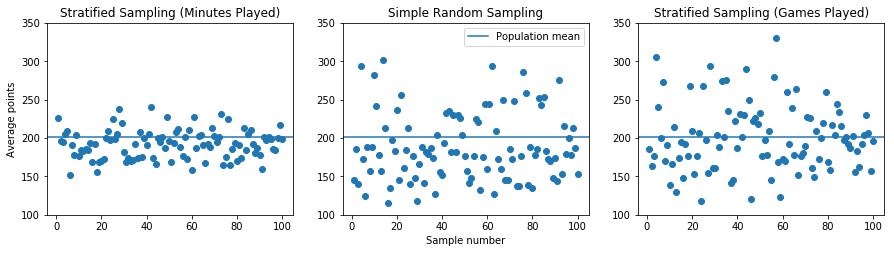

In [73]:
under_347 = wnba[wnba['MIN']<=347.333]
btw_348_682 = wnba[(wnba['MIN']>347.333) & (wnba['MIN']<=682.667)]
over_682 = wnba[wnba['MIN']>682.667]

pro_sample_means = []

for n in range(100):
    sample_1 = under_347['PTS'].sample(4, random_state=n)
    sample_2 = btw_348_682['PTS'].sample(4, random_state=n)
    sample_3 = over_682['PTS'].sample(3, random_state=n)
    final_sample = pd.concat([sample_1, sample_2, sample_3])
    pro_sample_means.append(final_sample.mean())
    
# let's compare this strata with the last ones.
fig = plt.figure(figsize=(15,12))

ax1 = fig.add_subplot(3,3,1)
ax1.scatter(range(1,101), pro_sample_means)
ax1.axhline(population_mean)
ax1.set_ylim(100,350)
ax1.set_ylabel('Average points')
ax1.set_title('Stratified Sampling (Minutes Played)')

ax2 = fig.add_subplot(3,3,2)
ax2.scatter(range(1,101), sample_means)
ax2.axhline(population_mean, label='Population mean')
ax2.set_ylim(100,350)
ax2.set_xlabel('Sample number')
ax2.set_title('Simple Random Sampling')
ax2.legend(loc='upper right')

ax3 = fig.add_subplot(3,3,3)
ax3.scatter(range(1,101), propor_sample_means)
ax3.axhline(population_mean)
ax3.set_ylim(100,350)
ax3.set_title('Stratified Sampling (Games Played)')

plt.show()

The stratified sampling by minutes played is actually much more relevant than the 2 other sampling methods.

## Cluster Sampling

In [75]:
# list all of the team during this season
team = wnba['Team'].unique()
team

array(['DAL', 'LA', 'CON', 'SAN', 'MIN', 'SEA', 'PHO', 'CHI', 'WAS', 'NY',
       'ATL', 'IND'], dtype=object)

In [78]:
# pick up randomly 4 of the team
clusters = pd.Series(team).sample(4, random_state=0)

# make a new data set
sample = pd.DataFrame()

# collect data from the 4 teams picked and append them to the new data set
for cluster in clusters:
    data_collected = wnba[wnba['Team'] == cluster]
    sample = sample.append(data_collected)
    
# find the sampling error of the average of height, age, BMI and total points
sampling_error_height = wnba['Height'].mean() - sample['Height'].mean()
sampling_error_age = wnba['Age'].mean() - sample['Age'].mean()
sampling_error_BMI = wnba['BMI'].mean() - sample['BMI'].mean()
sampling_error_points = wnba['PTS'].mean() - sample['PTS'].mean()

print(sampling_error_height)
print(sampling_error_age)
print(sampling_error_BMI)
print(sampling_error_points)

-0.06400121617511445
-1.401337792642142
0.23095444165950596
-27.79674673152934
